In [1]:
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator

mp_key = "ER5V8i0JUw7k31Nk5IpkvogP61BDz9cw"
mp_id = "mp-149"
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
conv_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

**Note: on travaille sur la maille conventionnelle.**

# Diffractogramme

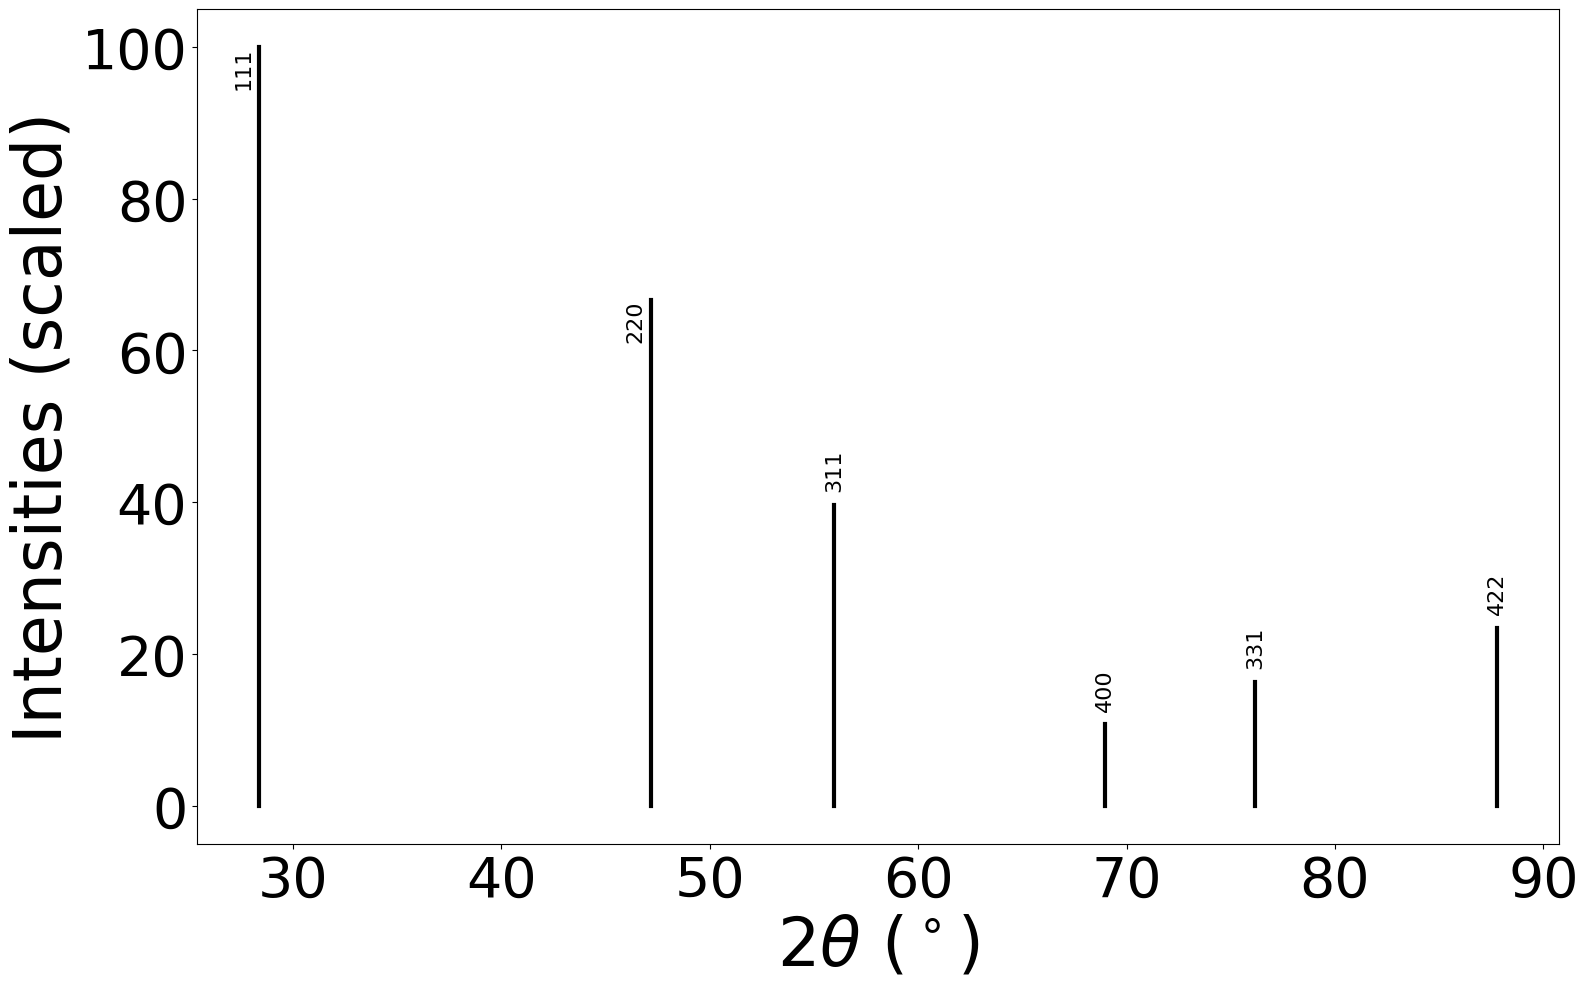

In [2]:
xrd = XRDCalculator(wavelength = 1.54060)  # rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.
xrd.get_plot(conv_structure)
pattern = xrd.get_pattern(conv_structure)

# Résultat des 3 premiers pics

In [3]:
for i in range(3):
    theta2 = pattern.x[i]
    intensité = pattern.y[i]
    indices_hkl = pattern.hkls[i][0].get("hkl")
    multiplicité = pattern.hkls[i][0].get("multiplicity")
    print("Pic numéro " + str(i+1) +":\n")
    print("- L'angle 2θ vaut: " + str(theta2) +"°\n")
    print("- L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: " +str(intensité) +"\n")
    print("- Les indices (h,k,l) sont " + str(indices_hkl) +"  et de multiplicité " + str(multiplicité) +"\n\n")

Pic numéro 1:

- L'angle 2θ vaut: 28.374342418075237°

- L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: 100.0

- Les indices (h,k,l) sont (1, 1, 1)  et de multiplicité 8


Pic numéro 2:

- L'angle 2θ vaut: 47.18521672779279°

- L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: 66.71578582978357

- Les indices (h,k,l) sont (2, 2, 0)  et de multiplicité 12


Pic numéro 3:

- L'angle 2θ vaut: 55.979321735761445°

- L'intensité relative de ce pic (sur une échelle de 0 à 100) est de: 39.632579172327475

- Les indices (h,k,l) sont (3, 1, 1)  et de multiplicité 24


